<a href="https://colab.research.google.com/github/BoWarburton/DS-Unit-1-Sprint-4-Build-Week-1/blob/master/Unit_1_Build_Week_Bo_Warburton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Racial Justice in Connecticut Department of Children and Families Child Welfare Placements from July 1, 2015 to June 30, 2016

Abstract

Making reasonable efforts to keep extended families together is recognized as an important part of achieving successful outcomes in child welfare social work. We look at data regarding placement in relative care by the Connecticut Department of Children and Families (DCF) and ask if ethnicity is a factor in placement type.

Background

Three decades ago the Connecticut Department of Children and Families (DCF) settled a suit that alleged "dangerous and unlawful policies and practices" by signing a consent decree. That notorious agreement, still in effect after almost three decades, mandated 22 outcome measures and appointed a federal monitor. In order to achieve and track the outcomes, DCF spent $13 million to build LINK, a statewide computer system. I was a business systems analyst on that project.

Data

This data set, made possible by that system,lists numbers of children placed in various situations by month and ethnicity.

Question

Are DCF treatments affected by race? In the language of statistics, the null hypothesis is that all children are equally likely to be placed with relatives. If we reject the null hypothesis, it could mean several things, but I won't speculate on that.

Initial findings

The dataset only contains data on DCF office, region, ethnicity of the child, and initial placement by month. From the chart below, it seems that White and Hispanic children stay with extended family members more often that Other and Black.

Visualization: Mean rate of placement with relatives by race

Moreover, when I performed two-sided t-tests comparing Hispanic with each other group, I reject the null hypothesis.

Visualization: Mean rate of placement with relatives by race with density


## Data wrangling

### Import, examine

In [0]:
import numpy as np
import pandas as pd

In [3]:
df_original = pd.read_csv('https://raw.githubusercontent.com/BoWarburton/data/master/dcf.csv')
df_original.head(40)

,Data_as_of,DCF Region,DCF Office,Demographic,SFY,TOTAL_ENTRY,FOSTER_CARE,RELATIVE_CARE,SPECIAL_STUDY,THERAPEUTIC_FOSTER_CARE,PDC_SAFE_HOME,SHELTER,GROUP_HOME,RESIDENTIAL,DCF_HIGHMEADOWS,DCF_SOLNIT,DCF_CJTS,HOSPITAL,INDEPENDENT_LIVING,Demographic_Type
0,08/06/2015,Other,Other,BLACK,2005,77,3,2,0,0,2,0,1,45,0,1,23,0,0,Race
1,08/06/2015,Other,Other,HISPANIC,2005,70,6,0,0,0,1,0,2,41,0,2,18,0,0,Race
2,08/06/2015,Other,Other,OTHER,2005,23,0,0,0,0,0,0,0,21,0,0,2,0,0,Race
3,08/06/2015,Other,Other,WHITE,2005,61,2,5,0,0,1,0,4,40,0,1,8,0,0,Race
4,08/06/2015,Region 1,Bridgeport Office,BLACK,2005,126,64,12,1,3,19,11,2,10,2,0,1,1,0,Race
5,08/06/2015,Region 1,Bridgeport Office,HISPANIC,2005,105,54,21,1,1,15,2,2,6,0,0,2,0,1,Race
6,08/06/2015,Region 1,Bridgeport Office,OTHER,2005,12,6,0,1,1,3,1,0,0,0,0,0,0,0,Race
7,08/06/2015,Region 1,Bridgeport Office,WHITE,2005,53,22,3,0,1,12,3,1,9,0,2,0,0,0,Race
8,08/06/2015,Region 1,Norwalk Office,BLACK,2005,27,6,10,1,1,4,1,0,4,0,0,0,0,0,Race
9,08/06/2015,Region 1,Norwalk Office,HISPANIC,2005,20,7,7,0,0,1,1,1,3,0,0,0,0,0,Race


In [4]:
# 966 rows, four (one for each ethnicity) for each month in the period
df_original.shape

(966, 20)

In [5]:
# Each row show placements for one month by ethnicity, office, and region.
df_original.dtypes

Data_as_of                 object
DCF Region                 object
DCF Office                 object
Demographic                object
SFY                         int64
TOTAL_ENTRY                 int64
FOSTER_CARE                 int64
RELATIVE_CARE               int64
SPECIAL_STUDY               int64
THERAPEUTIC_FOSTER_CARE     int64
PDC_SAFE_HOME               int64
SHELTER                     int64
GROUP_HOME                  int64
RESIDENTIAL                 int64
DCF_HIGHMEADOWS             int64
DCF_SOLNIT                  int64
DCF_CJTS                    int64
HOSPITAL                    int64
INDEPENDENT_LIVING          int64
Demographic_Type           object
dtype: object

In [6]:
# There are no null values to be cleaned up
df_original.isnull().sum()

Data_as_of                 0
DCF Region                 0
DCF Office                 0
Demographic                0
SFY                        0
TOTAL_ENTRY                0
FOSTER_CARE                0
RELATIVE_CARE              0
SPECIAL_STUDY              0
THERAPEUTIC_FOSTER_CARE    0
PDC_SAFE_HOME              0
SHELTER                    0
GROUP_HOME                 0
RESIDENTIAL                0
DCF_HIGHMEADOWS            0
DCF_SOLNIT                 0
DCF_CJTS                   0
HOSPITAL                   0
INDEPENDENT_LIVING         0
Demographic_Type           0
dtype: int64

In [7]:
df_original.describe(include=[np.number])

,SFY,TOTAL_ENTRY,FOSTER_CARE,RELATIVE_CARE,SPECIAL_STUDY,THERAPEUTIC_FOSTER_CARE,PDC_SAFE_HOME,SHELTER,GROUP_HOME,RESIDENTIAL,DCF_HIGHMEADOWS,DCF_SOLNIT,DCF_CJTS,HOSPITAL,INDEPENDENT_LIVING
count,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000
mean,2011.808489,38.890269,16.948240,8.331263,1.387164,1.041408,3.057971,1.607660,0.760870,2.783644,0.072464,0.386128,1.075569,1.024845,0.413043
std,4.080482,39.466052,19.235207,10.122565,2.163570,1.959260,5.431891,2.361677,1.353468,4.864568,0.316928,0.770555,3.020394,1.920547,0.931985
min,2005.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,10.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,25.000000,10.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,55.000000,23.000000,12.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,2018.000000,220.000000,129.000000,57.000000,14.000000,18.000000,40.000000,14.000000,10.000000,45.000000,3.000000,6.000000,34.000000,18.000000,9.000000


In [8]:
df_original.describe(exclude=[np.number])

,Data_as_of,DCF Region,DCF Office,Demographic,Demographic_Type
count,966,966,966,966,966
unique,3,8,22,8,1
top,09/19/2017,Region 3,Hartford Office,Non-Hispanic White,Race
freq,524,179,60,150,966


We have 966 rows and 20 columns. Each row or observation is a monthly count of how many new children came into the system as of the date in 'data_as_of', the responsible office, and their initial placement. There are no null values or data entered in unusual formats, such as numbers stored as strings.

Column 'Demographic_Type' only has one value, so I will drop it. I assume that there are other datasets with different demographic type indicators.

The column 'TOTAL_ENTRY' is a feature engineered by the data owners. It is the sum of 'HOSPITAL_CARE' through 'INDEPENDENT_LIVING'.

The owners derived column 'SFY' (State Fiscal Year) from 'Data_as_of'.

I change column names to lowercase and replace spaces in column names with underscores to make data manipulation easier. I also combine two different methods of coding ethcnicity.

After data cleaning, we will have 966 rows and 19 columns. Of the columns, one is a date, three are categorical, and 15 are numerical and continuous. The latter 15 would be categorical if this data were in tidy format. That is because tidy data format requires that each variables be in rows, not columns, and "type of placement" is a variable.

### Remove redundant columns

In [9]:
# All the values in Demographic_Type are 'Race'
df_original.Demographic_Type.value_counts()

Race    966
Name: Demographic_Type, dtype: int64

In [10]:
# Make a simpler dataframe name and drop the column Demographic_Type
# based on the assumption that this data was pulled out from a larger source
# with other demographic types.
df_dcf = df_original
df_dcf = df_dcf.drop(columns=['Demographic_Type'])
df_dcf.shape

(966, 19)

### Fix column names

In [11]:
# Put column names in lower case
df_dcf.columns = map(str.lower, df_dcf.columns)
# Replace spaces in column names with underscores
df_dcf = df_dcf.rename(columns = {'dcf region':'dcf_region', 'dcf office':'dcf_office'})
df_dcf.dtypes

data_as_of                 object
dcf_region                 object
dcf_office                 object
demographic                object
sfy                         int64
total_entry                 int64
foster_care                 int64
relative_care               int64
special_study               int64
therapeutic_foster_care     int64
pdc_safe_home               int64
shelter                     int64
group_home                  int64
residential                 int64
dcf_highmeadows             int64
dcf_solnit                  int64
dcf_cjts                    int64
hospital                    int64
independent_living          int64
dtype: object

### Find and fix inconsistent coding

In [13]:
# What is going on with the UPPER CASE and Title Case values in 'Demographic' column?
df_dcf.demographic.value_counts()

Non-Hispanic White    150
Hispanic              150
Non-Hispanic Black    146
Non-Hispanic Other    137
HISPANIC               96
WHITE                  96
OTHER                  96
BLACK                  95
Name: demographic, dtype: int64

It appears that they switched the way they coded ethnicity around 2006. The use of "OTHER" as oppposed to "Non-Hispanic Other," for example, does not indicate that one or the other was a random sample or anything like that. Therefore, we can change the entries for consistency.

In [14]:
# Are the upper-case rows meant to be repeats, samples, or independent values?
df_dcf.loc[(df_dcf['demographic'] == 'Hispanic') | (df_dcf['demographic'] == 'HISPANIC')].sort_values(by=['data_as_of'])

,data_as_of,dcf_region,dcf_office,demographic,sfy,total_entry,foster_care,relative_care,special_study,therapeutic_foster_care,pdc_safe_home,shelter,group_home,residential,dcf_highmeadows,dcf_solnit,dcf_cjts,hospital,independent_living
1,08/06/2015,Other,Other,HISPANIC,2005,70,6,0,0,0,1,0,2,41,0,2,18,0,0
276,08/06/2015,Region 2,New Haven Office,HISPANIC,2009,81,45,11,0,2,14,2,0,5,0,1,0,1,0
272,08/06/2015,Region 2,Milford Office,HISPANIC,2009,19,11,2,0,0,1,1,2,1,0,0,0,0,1
268,08/06/2015,Region 1,Stamford Office,HISPANIC,2009,31,16,2,0,4,6,1,0,0,0,0,0,1,1
264,08/06/2015,Region 1,Norwalk Office,HISPANIC,2009,30,12,3,0,3,5,6,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,11/07/2018,Region 2,New Haven Office,Hispanic,2018,53,33,8,3,3,2,0,1,2,0,0,0,0,1
909,11/07/2018,Region 1,Bridgeport Office,Hispanic,2018,56,15,21,3,10,0,0,0,6,0,0,1,0,0
907,11/07/2018,Region 3,Willimantic Office,Hispanic,2018,35,21,6,2,0,0,3,0,0,0,0,0,2,1
927,11/07/2018,Region 1,Norwalk Office,Hispanic,2018,29,16,6,4,1,0,0,0,1,0,0,0,1,0


In [15]:
# Answer seems to be that they are values from different years
# Let's look into this some more by comparing where total_entry is the same
condition = (df_dcf.foster_care == 16)
df_dcf[condition].head(10)

,data_as_of,dcf_region,dcf_office,demographic,sfy,total_entry,foster_care,relative_care,special_study,therapeutic_foster_care,pdc_safe_home,shelter,group_home,residential,dcf_highmeadows,dcf_solnit,dcf_cjts,hospital,independent_living
27,08/06/2015,Region 3,Middletown Office,WHITE,2005,71,16,17,3,0,18,6,1,8,0,0,0,1,1
45,08/06/2015,Region 5,Danbury Office,HISPANIC,2005,32,16,5,2,0,5,1,1,2,0,0,0,0,0
91,08/06/2015,Region 3,Middletown Office,WHITE,2006,68,16,9,1,5,11,3,3,15,2,1,0,1,1
111,08/06/2015,Region 5,Danbury Office,WHITE,2006,38,16,11,0,0,4,2,0,4,0,1,0,0,0
124,08/06/2015,Region 6,New Britain Office,BLACK,2006,37,16,4,2,0,9,2,2,1,0,0,0,0,1
182,08/06/2015,Region 5,Waterbury Office,OTHER,2007,22,16,3,0,0,1,0,0,2,0,0,0,0,0
219,08/06/2015,Region 3,Middletown Office,WHITE,2008,42,16,8,1,1,1,7,2,4,0,1,0,1,0
268,08/06/2015,Region 1,Stamford Office,HISPANIC,2009,31,16,2,0,4,6,1,0,0,0,0,0,1,1
302,08/06/2015,Region 5,Danbury Office,WHITE,2009,41,16,9,3,0,3,2,1,2,0,1,0,4,0
399,09/19/2017,Region 1,Bridgeport Office,Non-Hispanic White,2011,32,16,8,0,0,3,1,0,3,0,0,0,1,0


In [0]:
# So, even in cases where "WHITE" and "Non-Hispanic White" both showed
# 16 new foster_care, they were from different offices and months.
# This is evidence that in 2006 and 2007, they changed coding.
# They entered "HISPANIC" and from 2012 on they entered "Hispanic"
# That is also when they started using "Non-Hispanic White" and so forth
demographic_dictionary = {'HISPANIC':'hispanic', 'Hispanic':'hispanic',
      'BLACK':'black', 'Non-Hispanic Black':'black',
      'WHITE':'white', 'Non-Hispanic White':'white',
      'OTHER':'other', 'Non-Hispanic Other':'other'}
df_dcf = df_dcf.replace({'demographic': demographic_dictionary})

In [17]:
df_dcf.demographic.value_counts()

white       246
hispanic    246
black       241
other       233
Name: demographic, dtype: int64

## Exploratory data analysis and feature engineering

Look at basic plots, make separate dataframes for each race, perform t-tests, look at pandas.profile, possibly Seaborn plots

In [0]:
# How many new entrants (placements) by year?
# Select data I want, then sum
# Sum values in a column based on the values in another column
# Sumit, countif, sumproduct in Excel or Google Sheets
# df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
# train = df[df.Date.dt.year <= 2016]
# val = df[df.Date.dt.year == 2017]
# test = df[df.Date.dt.year >= 2018]
# convert all columns of DataFrame
# df_numeric = df.apply(pd.to_numeric)
# convert just columns "a" and "b"
# df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)
df.loc[(df['a'] == 1) & (df['c'] == 2), 'b'].sum()
df_dcf.query('demographic == black' and 'sfy == 2005')['total_entry'].sum()
df_dcf.groupby('sfy')['total_entry'].sum()
df_dcf[df_dcf['sfy']==2014]['total_entry'].sum()

# Or the above using condition = (df_dcf['sfy']==2014)
df_dcf[condition]['total_entry'].sum()

### Make a summary table
I want a dataframe that shows total placements and relative care placements for each ethnicity by month (add up values for each office).

(Note to self: I bet this would be easier if I first tidied.)

In [39]:
# What are the unique values in sfy?
# df_dcf['sfy'].nunique()
df_dcf.sfy.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

In [1]:
# Total number of placements in 2006
def sum_by_sfy(year):
  return df_dcf.loc[df_dcf['sfy'] == year, 'total_entry'].sum()
sum_by_sfy(2006)

NameError: ignored

In [0]:
# Create new column using apply
df_dcf['percentage'] = df_dcf['total_entry'] / df_dcf[]

In [0]:
# Actually, I don't need annual totals, let's do monthly


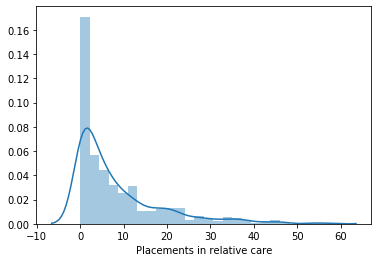

In [18]:
import seaborn as sns
# See if a Seaborn distribution plot tells us anything
x = pd.Series(df_dcf['relative_care'], name='Placements in relative care')
sns.distplot(x)

In [0]:
# Create dataframes for each race
df_black = df_dcf[df_dcf['demographic'] == 'black']
print(df_black.head(5))
df_other = df_dcf[df_dcf['demographic'] == 'other']
print(df_other.head(5))
df_hispanic = df_dcf[df_dcf['demographic'] == 'hispanic']
print(df_hispanic.head(5))
df_white = df_dcf[df_dcf['demographic'] == 'white']
df_white.tail(5)

    data_as_of dcf_region  ... hospital independent_living
0   08/06/2015      Other  ...        0                  0
4   08/06/2015   Region 1  ...        1                  0
8   08/06/2015   Region 1  ...        0                  0
12  08/06/2015   Region 1  ...        1                  0
16  08/06/2015   Region 2  ...        1                  0

[5 rows x 17 columns]
    data_as_of dcf_region  ... hospital independent_living
2   08/06/2015      Other  ...        0                  0
6   08/06/2015   Region 1  ...        0                  0
10  08/06/2015   Region 1  ...        0                  0
14  08/06/2015   Region 1  ...        0                  0
18  08/06/2015   Region 2  ...        0                  0

[5 rows x 17 columns]
    data_as_of dcf_region  ... hospital independent_living
1   08/06/2015      Other  ...        0                  0
5   08/06/2015   Region 1  ...        0                  1
9   08/06/2015   Region 1  ...        0                  0
13  08/06/

,data_as_of,dcf_region,dcf_office,demographic,foster_care,relative_care,special_study,therapeutic_foster_care,pdc_safe_home,shelter,group_home,residential,dcf_highmeadows,dcf_solnit,dcf_cjts,hospital,independent_living
942,11/07/2018,Region 2,Milford Office,white,22,20,4,1,2,2,0,0,0,0,0,0,0
946,11/07/2018,Region 5,Danbury Office,white,22,10,4,0,0,0,0,0,0,0,0,1,0
949,11/07/2018,Region 3,Willimantic Office,white,33,36,7,2,2,4,0,2,0,1,0,9,1
956,11/07/2018,Region 5,Waterbury Office,white,25,36,1,6,1,0,0,3,0,0,0,1,0
958,11/07/2018,Region 1,Bridgeport Office,white,17,13,1,3,0,0,0,4,0,0,0,0,2


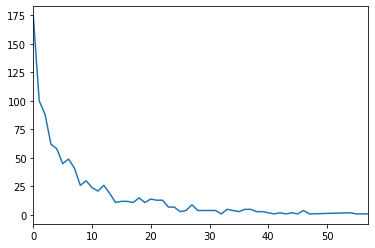

In [0]:
# Line plot shows that values for 'relative_care' are not normally distributed
df_dcf['relative_care'].value_counts().sort_index().plot()

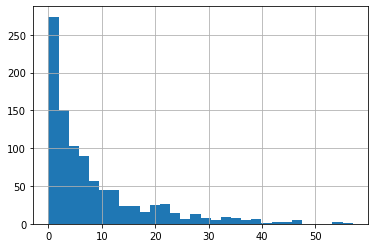

In [0]:
# Histogram shows the same thing in a different way
df_dcf['relative_care'].hist(bins=30)

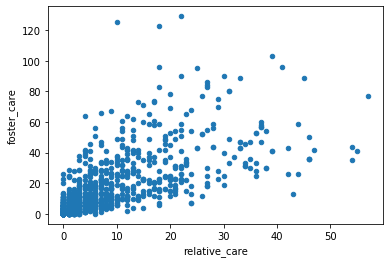

In [0]:
# I wonder if there is some linear relationship between, relative_care
# and foster_care? Seems yes...but that doesn't really get me anything
df_dcf.plot.scatter('relative_care', 'foster_care')

## Visualization: Mean rate of placement with relatives with density

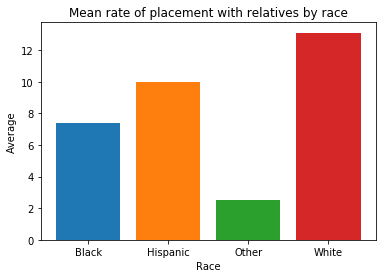

In [0]:
# Basic bar chart: what's the average relative_care placements by race?
import matplotlib.pyplot as plt
df = pd.DataFrame(df_original)
fig, ax = plt.subplots();
fig.patch.set(facecolor = 'white');
ax.set_title('Mean rate of placement with relatives by race')
ax.set_ylabel('Average')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Black','Hispanic', 'Other', 'White'])
ax.bar(x=0, height=df_black['relative_care'].mean())
ax.bar(x=1, height=df_hispanic['relative_care'].mean())
ax.bar(x=2, height=df_other['relative_care'].mean())
ax.bar(x=3, height=df_white['relative_care'].mean())
ax.set(facecolor='white');
#ax.plot(df, color='C1');
ax.set_xlabel('Race');

In [0]:
# Numbers for the histogram above
print('Mean rate of relative care placement')
print('OVERALL', round(df_dcf.relative_care.mean(), 2))
print('Hispanic:', round(df_hispanic.relative_care.mean(), 2))
print('Black:', round(df_black.relative_care.mean(), 2))
print('White:', round(df_white.relative_care.mean(), 2))
print('Other:', round(df_other.relative_care.mean(), 2))

Mean rate of relative care placement
OVERALL 8.33
Hispanic: 9.98
Black: 7.41
White: 13.11
Other: 2.5


In [0]:
# With high t-statistics and low p-values, I reject the null hypothesis
# That Hispanic ethnicity has no effect on the chance of being placed
# In relative care.
import scipy.stats as stats
print('Two-sided t-test hispanic vs black\n', stats.ttest_ind(df_hispanic.relative_care, df_black.relative_care))
print('Two-sided t-test hispanic vs other\n', stats.ttest_ind(df_hispanic.relative_care, df_other.relative_care))
print('Two-sided t-test hispanic vs white\n', stats.ttest_ind(df_hispanic.relative_care, df_white.relative_care))

Two-sided t-test hispanic vs black
 Ttest_indResult(statistic=2.85253959981737, pvalue=0.004522385322670731)
Two-sided t-test hispanic vs other
 Ttest_indResult(statistic=10.120983498341259, pvalue=6.09170158072021e-22)
Two-sided t-test hispanic vs white
 Ttest_indResult(statistic=-3.0400697723655177, pvalue=0.0024917748663368794)


## Visualization: Mean rate of placement with relatives by race with density

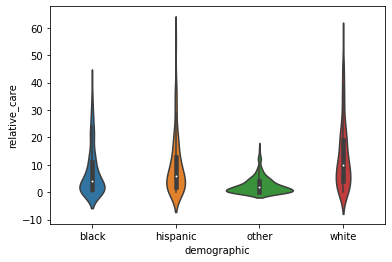

In [0]:
# Violin plot gives more detail on the difference between ethnicities.
# Specifically, White and Hispanic have a few entries with very high numbers.
import seaborn as sns
sns.violinplot(x='demographic', y='relative_care', data=df_dcf)

## Future directions: tidy data
To put this in tidy format, placement type should be a column. The different placements (group home, relative care, etc.) would be categorical variables represented as strings.

Going further, if I replace the strings as numbers, I could run k-means testing to look for clusters. The presumption here would be that we could get a label later indicating the success of the placement, for example did it last for six months, full course of treatment, etc.

In [0]:
# Make a tidy data table so that relative_care, demographic, and dcf_office are in rows
# After replacing these with numeric, we can do k-means to see if there are clusters
df_tidy = df_dcf.melt(id_vars=['demographic',
                               'data_as_of',
                               'dcf_office'],
                      value_vars=['foster_care',
                                  'relative_care',
                                  'special_study',
                                  'pdc_safe_home',
                                  'shelter',
                                  'group_home',
                                  'residential',
                                  'dcf_cjts',
                                  'hospital'
                                  ])
df_tidy.head()

,demographic,data_as_of,dcf_office,variable,value
0,black,08/06/2015,Other,foster_care,3
1,hispanic,08/06/2015,Other,foster_care,6
2,other,08/06/2015,Other,foster_care,0
3,white,08/06/2015,Other,foster_care,2
4,black,08/06/2015,Bridgeport Office,foster_care,64
